In [1]:
import h5py    
import numpy as np  
import bluepysnap
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Axes
import bluepysnap
from bluepysnap import Simulation as snap_sim
from pathlib import Path
import seaborn as sns
import pandas as pd
#plt.rc('text', usetex=True)

In [4]:
color_ndam = '#544B3D'
color_met = '#FFA400'

In [5]:
def read_result(result_path):
    read_result = h5py.File(result_path)
    result = read_result['report']['All']['data']

    return(result)

def mapping_extract(result_path):
    read_result = h5py.File(result_path)
    result = read_result['report']['All']['data']
        
    extract_mapping = read_result['report']['All']['mapping']['node_ids'][:]
    
    t0 = read_result['report']['All']['mapping']['time'][0]
    T =read_result['report']['All']['mapping']['time'][1]
    dt = read_result['report']['All']['mapping']['time'][2]

    
    N= (T-t0)/dt
    time_line = np.linspace(t0,T, int(N))
    N2 = (T-t0)/0.025
    voltage_time_line = np.linspace(t0,T,int(N2))
    return(extract_mapping, time_line, voltage_time_line)

In [6]:
# read the circuit from ../config/circuit_config.json
# NOTE: in circuit_config.json many path are relative
# We need to read the circuit to get the info about the neurons as e-type and layer
#circuit = bluepysnap.Circuit('/gpfs/bbp.cscs.ch/data/project/proj137/farinaNGV/Paper_results/config/circuit_config.json')
circuit = bluepysnap.Circuit('../config/circuit_config.json')
node_population = circuit.nodes["All"]
print('Nodes in the circuit', len(node_population.get().index.to_list()))

Nodes in the circuit 129348


In [7]:
# Path: Results Folder can be downloaded from 10.5281/zenodo.14187063
results_path = '/gpfs/bbp.cscs.ch/data/project/proj137/farinaNGV/Paper_results/my_simulation/'

In [8]:
# Neurodamus (only Electrophysiological model with ATP constant=1.38 mM)
sim_results_path = results_path + 'reporting_neurodamus/'

voltage_ndam = read_result(sim_results_path + 'ndam_v.h5')
Nai_ndam = read_result(sim_results_path+  'ndam_nai.h5')
Ki_ndam = read_result(sim_results_path+ 'ndam_ki.h5')
ATP_ndam = read_result(sim_results_path+  'ndam_atpi.h5')
ADP_ndam = read_result(sim_results_path+ 'ndam_adpi.h5')
cai_ndam = read_result(sim_results_path+ 'ndam_cai.h5')
cli_sndam = read_result(sim_results_path+ 'ndam_cli.h5')
#after_ATP_sim0 = read_result(sim_results_path+ 'metab_atpi_after_sync.h5')

mapping_ndam,time_line_ndam, volt_time_ndam = mapping_extract(sim_results_path+ 'ndam_nai.h5')

In [9]:
# Metabolism with Young Parameters
sim_results_path = results_path + 'reporting_metabolism_young/'

voltage_met = read_result(sim_results_path + 'ndam_v.h5')
Nai_met = read_result(sim_results_path+  'ndam_nai.h5')
Ki_met = read_result(sim_results_path+ 'ndam_ki.h5')
ATP_met = read_result(sim_results_path+  'ndam_atpi.h5')
ADP_met = read_result(sim_results_path+ 'ndam_adpi.h5')
cai_met = read_result(sim_results_path+ 'ndam_cai.h5')
cli_met = read_result(sim_results_path+ 'ndam_cli.h5')
after_ATP_met = read_result(sim_results_path+ 'metab_atpi_after_sync.h5')

mapping_met,time_line_met, volt_time_met = mapping_extract(sim_results_path+ 'ndam_nai.h5')

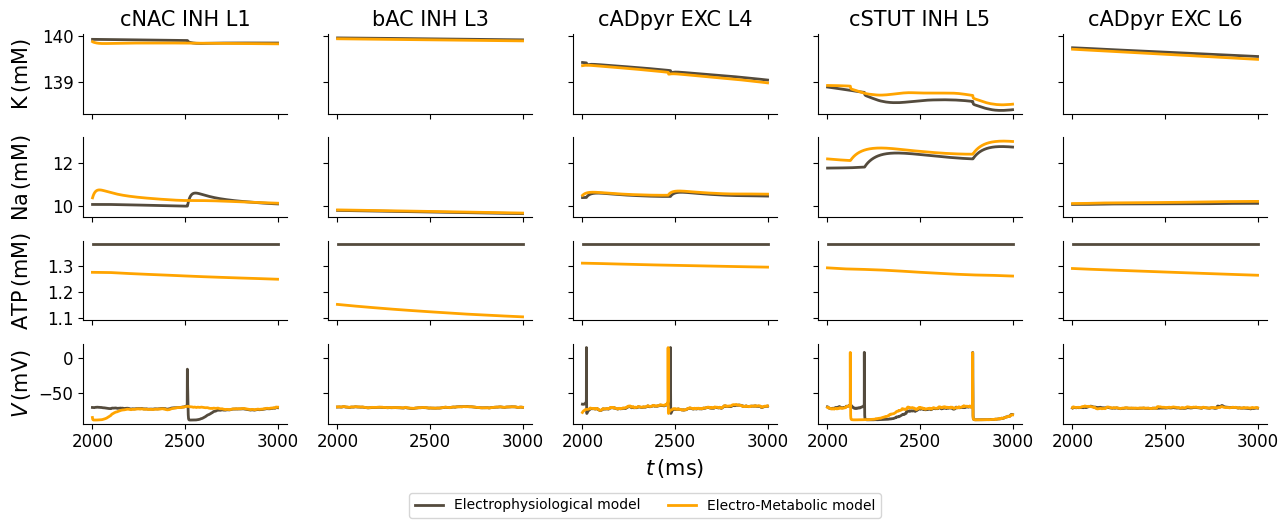

In [10]:
fig, axs = plt.subplots(4, 5, figsize=(13, 5), sharex='col', sharey='row')
t_start = 2000
t_end = 3000
a = 1. # transparency

# neurons chosen to plot
neurones = [26629, 19208,49696,100575, 41337]
for i in range(5):
    
    idx = neurones[i]
    ind_c= np.where(mapping_met==idx)[0]
    
    axs[0,i].plot(time_line_ndam[t_start:t_end], Ki_ndam[t_start:t_end,ind_c],linewidth=2, c=color_ndam)
    axs[1,i].plot(time_line_ndam[t_start:t_end], Nai_ndam[t_start:t_end,ind_c],linewidth=2, c=color_ndam)
    axs[2,i].plot(time_line_ndam[t_start:t_end], ATP_ndam[t_start:t_end,ind_c],linewidth=2, c=color_ndam)
    axs[3,i].plot(volt_time_ndam[int(t_start/0.025):int(t_end/0.025)], voltage_ndam[int(t_start/0.025):int(t_end/0.025),ind_c],linewidth=2, c=color_ndam)
    
    axs[0,i].plot(time_line_met[t_start:t_end], Ki_met[t_start:t_end,ind_c],linewidth=2, alpha=a, c=color_met)
    axs[1,i].plot(time_line_met[t_start:t_end], Nai_met[t_start:t_end,ind_c],linewidth=2, alpha=a, c=color_met)
    axs[2,i].plot(np.arange(t_start,t_end+100,100), after_ATP_met[int(t_start/100):int((t_end+100)/100),ind_c],linewidth=2, alpha=a, c=color_met)
    axs[3,i].plot(volt_time_met[int(t_start/0.025):int(t_end/0.025)], voltage_met[int(t_start/0.025):int(t_end/0.025),ind_c],linewidth=2, alpha=a, c=color_met)
    
    # Hide the right and top spines
    for k in range(4):
        axs[k,i].spines[['right', 'top']].set_visible(False)
    
    
    
    cell_id = node_population.get(idx)
    axs[0,i].set_title(str(cell_id.get('etype'))+f" {str(cell_id.get('synapse_class'))}" + f" L{str(cell_id.get('layer'))}" , fontsize =15)
    
    axs[3,2].set_xlabel("$t\, (\mathrm{ms})$", fontsize=15)
    axs[0,i].tick_params(axis='both', labelsize=12)
    axs[1,i].tick_params(axis='both', labelsize=12)
    axs[2,i].tick_params(axis='both', labelsize=12)
    axs[3,i].tick_params(axis='both', labelsize=12)




list_title = ["$\mathrm{K}\, (\mathrm{mM})$","$\mathrm{Na}\, (\mathrm{mM})$", "$\mathrm{ATP}\, (\mathrm{mM})$", "$V\, (\mathrm{mV})$"]

k=0
for i,ax in enumerate(axs.flat):
   
    if i% 5 == 0:
        ax.set_ylabel(list_title[k],fontsize=15)
        k+=1

lgd = plt.figlegend(labels= ['Electrophysiological model', 'Electro-Metabolic model'] , loc = 'lower center', ncol=5, bbox_to_anchor = (0, -0.06, 1, 1), fontsize=10)

# just align the last column of Axes:
fig.align_ylabels(axs[:, 0])

fig.tight_layout()
#plt.savefig("./RESULTS/Figure2a.pdf", format="pdf", bbox_inches='tight')